In [96]:
from nlp import *

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [97]:
data_file = "../Dataset/twitter.csv"

init_nltk_downloads()
df = load_twitter_csv(data_file)

df['tweet'] = df['tweet'].apply(furnish)

In [98]:
tfidf_vect = TfidfVectorizer(min_df=5, max_df=0.95)
term_matrix = tfidf_vect.fit_transform(df['tweet'].values.astype('U'))

In [99]:
count_vect = CountVectorizer(min_df=5, max_df=0.95)
term_matrix = count_vect.fit_transform(df['tweet'].values.astype('U'))

/home/tin/mambaforge/envs/gcrl2000/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitted 2 clusters!
Fitted 4 clusters!
Fitted 6 clusters!
Fitted 8 clusters!
Fitted 10 clusters!
Fitted 12 clusters!
Fitted 14 clusters!
Fitted 16 clusters!
Fitted 18 clusters!
Fitted 20 clusters!


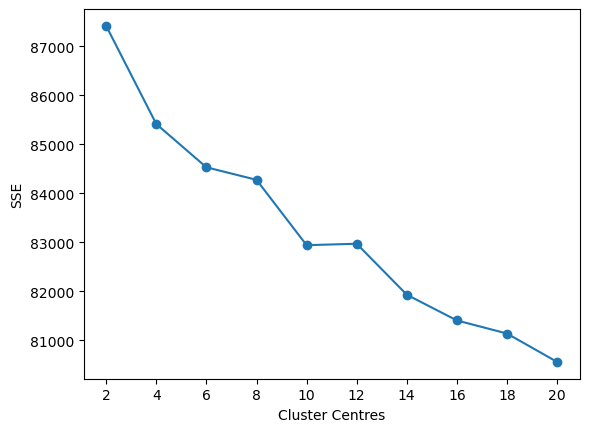

In [100]:
find_optimal_clusters(term_matrix, 20)

In [101]:
kmeans = KMeans(n_clusters=5, random_state=520)
clusters = kmeans.fit_predict(term_matrix)

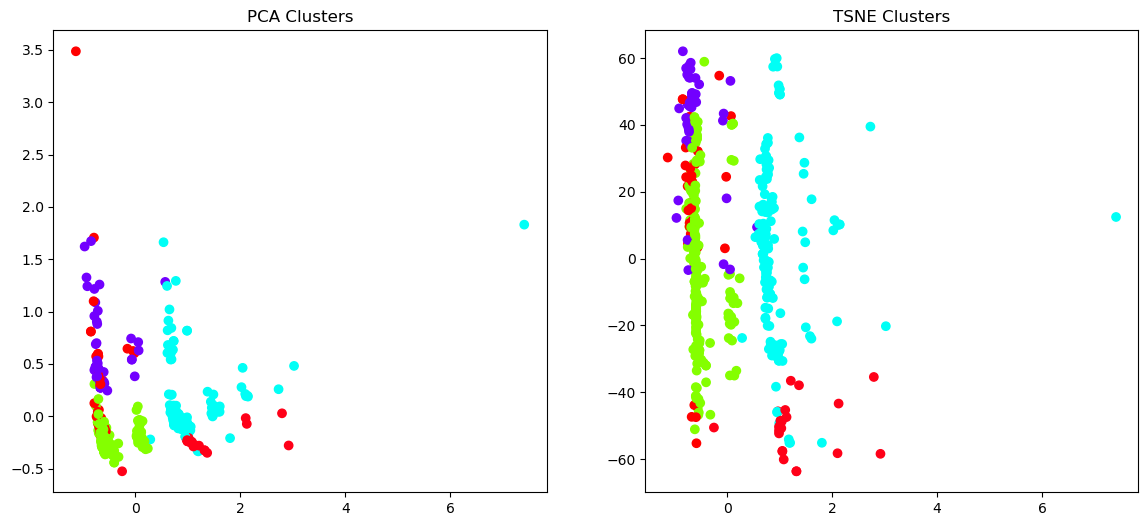

In [102]:
plot_clusters(term_matrix, clusters)

In [103]:
max_label = max(clusters)
max_items = np.random.choice(range(term_matrix.shape[0]), size=3000)

In [104]:
pca = PCA(n_components=2).fit_transform(
    np.asarray(term_matrix[max_items, :].todense())
)

In [105]:
tsne = TSNE().fit_transform(
    PCA(n_components=50).fit_transform(
        np.asarray(term_matrix[max_items, :].todense())
    )
)

In [106]:
nmf = NMF(n_components=4).fit_transform(
    np.asarray(term_matrix[max_items, :].todense()))

In [107]:
lda = LatentDirichletAllocation(n_components=4).fit_transform(
    np.asarray(term_matrix[max_items, :].todense())
)

In [108]:
idx = np.random.choice(range(nmf.shape[0]), size=2000, replace=False)

label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

Text(0.5, 1.0, 'LDA Clusters')

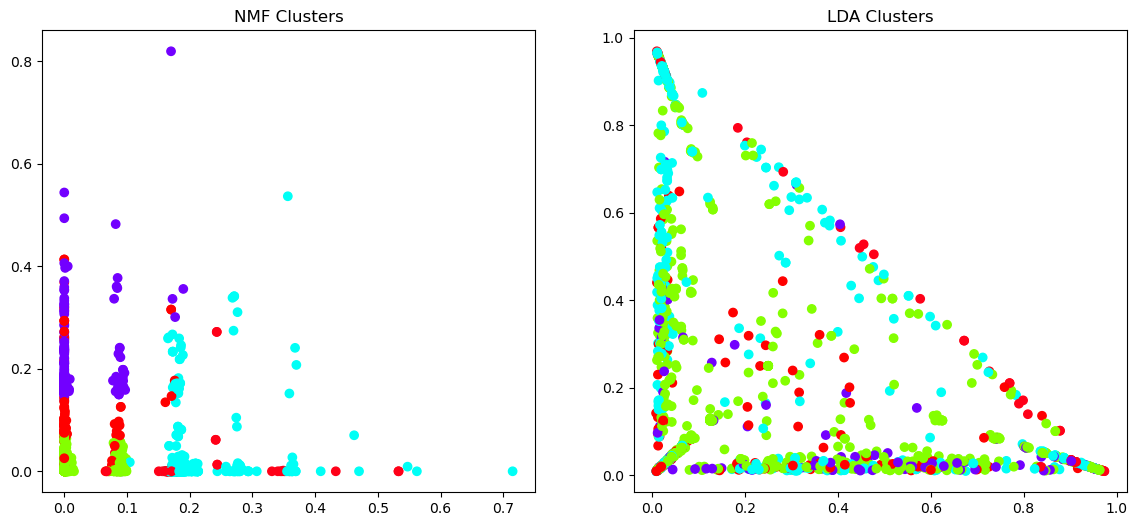

In [109]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(nmf[idx, 0], nmf[idx, 1], c=label_subset)
ax[0].set_title("NMF Clusters")
ax[1].scatter(lda[idx, 0], lda[idx, 1], c=label_subset)
ax[1].set_title("LDA Clusters")